In [2]:
import pandas as pd

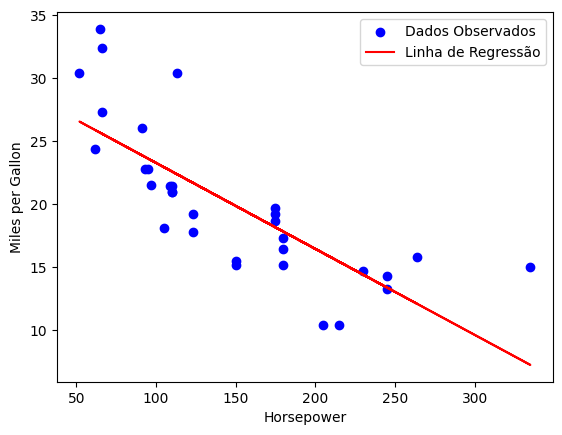

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Dados de exemplo
data = sm.datasets.get_rdataset("mtcars").data
X = data["hp"]  # horsepower
y = data["mpg"]  # miles per gallon
X = sm.add_constant(X)  # adicionar constante

# Ajustando o modelo
model = sm.OLS(y, X).fit()

# Plotando
fig, ax = plt.subplots()
ax.scatter(X["hp"], y, color='blue', label='Dados Observados')
ax.plot(X["hp"], model.fittedvalues, color='red', label='Linha de Regressão')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per Gallon')
ax.legend()
plt.show()


In [6]:
model.pvalues

const    6.642736e-18
hp       1.787835e-07
dtype: float64

In [7]:
model.params

const    30.098861
hp       -0.068228
dtype: float64

In [10]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Sun, 05 May 2024   Prob (F-statistic):           1.79e-07
Time:                        18:20:48   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.0

---

## **Teste de Homocedasticidade**


**Funcionamento do Teste de Breusch-Pagan**

- **Resíduos e Valores Previstos:** O código começa obtendo os resíduos (model.resid) e os valores previstos (model.fittedvalues) do modelo de regressão ajustado.

- **Execução do Teste:** O teste de Breusch-Pagan é aplicado usando a função het_breuschpagan, que recebe como argumentos os resíduos e a matriz de variáveis independentes incluindo o intercepto (model.model.exog).

- **Resultados do Teste:** A função het_breuschpagan retorna quatro valores:
- **LM Statistic:** Uma estatística de teste de Lagrange Multiplier (LM) para heterocedasticidade.

- **LM-Test p-value:** O p-valor associado à estatística LM, que testa a hipótese nula de que os erros têm variância constante (homocedasticidade).

- **F-Statistic:**Uma estatística de teste F, que é uma alternativa à estatística LM.

- **F-Test p-value:** O p-valor associado ao teste F.


**Interpretação dos Resultados**</br>
- **LM Statistic e LM-Test p-value:**</br>
- A estatística LM mede a probabilidade de que as variâncias dos resíduos sejam diferentes ao longo das observações. Um valor alto indica maior evidência contra a homocedasticidade.</br>

- **O p-valor** do teste LM ajuda a decidir se a heterocedasticidade é estatisticamente significativa. Se este p-valor for menor que um limiar (geralmente 0.05), então rejeita-se a hipótese nula de homocedasticidade, indicando a presença de heterocedasticidade.</br>

- **F-Statistic e F-Test p-value:**</br>
A estatística F também testa a heterocedasticidade e é derivada da mesma forma que a estatística LM, mas usando um modelo auxiliar de regressão. O teste F é frequentemente considerado mais robusto e confiável.</br>
- **O p-valor** do teste F é interpretado da mesma forma que o p-valor do teste LM. Um p-valor abaixo de 0.05 indica que os resíduos não têm variância constante, sugerindo a rejeição da homocedasticidade.

### **Conclusão**
Se algum dos p-valores (LM ou F) for baixo (tipicamente <0.05), isso indica que há evidências significativas de heterocedasticidade. Neste caso, pode ser necessário ajustar o modelo ou usar métodos estatísticos que sejam robustos à heterocedasticidade, como o uso de erros padrão robustos ou a aplicação de técnicas de ponderação nas observações.

In [11]:
from statsmodels.stats.diagnostic import het_breuschpagan

# Resíduos e valores previstos
residuals = model.resid
predictions = model.fittedvalues

# Teste de Breusch-Pagan
test = het_breuschpagan(residuals, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, test)))

{'LM Statistic': 0.04929759271601242, 'LM-Test p-value': 0.8242900530026718, 'F-Statistic': 0.04628780183384193, 'F-Test p-value': 0.8311094326059991}


---

## **Teste de Autocorrelação**

 **Como Funciona o Teste de Durbin-Watson**
O teste calcula uma estatística que varia de 0 a 4, onde:

- Um valor de 2 indica nenhuma autocorrelação.
- Valores menores que 2 sugerem autocorrelação positiva.
- Valores maiores que 2 indicam autocorrelação negativa.

**Interpretação da Saída do Código**
O código que você forneceu realiza o teste de Durbin-Watson nos resíduos de um modelo de regressão, arredonda o resultado para duas casas decimais e imprime o valor. O resultado, neste caso, é a estatística de Durbin-Watson arredondada, representada pela variável dw.

- **print(f'Durbin-Watson statistic: {dw}'):** Esta linha imprime a estatística de Durbin-Watson. Por exemplo, se dw for 1.50, o output seria "Durbin-Watson statistic: 1.50".

**Como Avaliar o Resultado**
- **Próximo a 2.00:** Indica que não há evidência de autocorrelação nos resíduos do modelo.
- **Menor que 2.00:** Sugere a presença de autocorrelação positiva. Quanto mais próximo de 0, mais forte é a autocorrelação positiva. Isso pode ocorrer em dados onde os resíduos em um tempo t tendem a ser semelhantes ou iguais aos de t-1.
- **Maior que 2.00:** Indica autocorrelação negativa. Quanto mais próximo de 4, mais forte é a autocorrelação negativa. Isso ocorre quando os resíduos em um tempo t são opostos aos de t-1.

**Ação com Base no Resultado**
- Se o valor estiver longe de 2 e especialmente se estiver próximo de 0 ou 4, você deve considerar métodos para ajustar o modelo para lidar com a autocorrelação. Isso pode incluir:

- Revisar a especificação do modelo (adicionar lags das variáveis independentes, por exemplo).
Usar técnicas de modelagem específicas para dados com autocorrelação, como modelos ARIMA em séries temporais.

- Ajustar a análise para usar erros padrão robustos a autocorrelação (Newey-West, por exemplo).

In [19]:
from statsmodels.stats.stattools import durbin_watson

# Teste de Durbin-Watson
dw = durbin_watson(residuals)
dw = round(dw,2)
print(f'Durbin-Watson statistic: {dw}')

Durbin-Watson statistic: 1.13


---

## **Teste de Multicolinearidade**

O VIF mede o quanto a variância de um coeficiente estimado é aumentada devido à multicolinearidade.

- **VIF = 1:** Não há multicolinearidade entre a variável e as outras.
- **1 < VIF < 5:** Multicolinearidade moderada, mas geralmente não é alarmante.
- **VIF >= 5:** Multicolinearidade pode ser problemática. Valores de VIF de 5 ou mais indicam que a variável está altamente correlacionada com outras variáveis no modelo, e a precisão das estimativas dos coeficientes dessa variável pode ser afetada.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculando VIF para cada variável
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

   VIF Factor features
0    5.724943    const
1    1.000000       hp


---

## **Teste de Normalidade dos Resíduos**

 Shapiro-Wilk, que é usado para verificar a normalidade dos dados. No contexto de análise de regressão, é comum aplicar este teste aos resíduos do modelo para verificar se eles estão normalmente distribuídos. A normalidade dos resíduos é uma importante premissa em muitos modelos de regressão linear, pois afeta a validade dos testes estatísticos para os coeficientes da regressão.

**O Teste de Shapiro-Wilk**
**Objetivo:** Testar a hipótese nula de que uma amostra vem de uma distribuição normal.

- **Estatística de Teste:** Uma estatística que mede o quanto a distribuição da amostra se desvia de uma distribuição normal. Valores mais próximos de 1 indicam que a amostra é mais provável de ser normal.

-**p-Valor:** Usado para decidir se rejeita ou não a hipótese nula. Um p-valor baixo (geralmente menor que 0.05) indica que você tem evidência suficiente para rejeitar a hipótese nula de normalidade.
Interpretação da Saída do Código

--**Quando você executa o código, ele imprime dois valores:**
Shapiro-Wilk Test Statistic: A estatística do teste, que quanto mais próxima de 1, mais normal é considerada a distribuição dos dados.
p-Value: O p-valor associado ao teste.

In [15]:
from scipy.stats import shapiro

# Teste de Shapiro-Wilk
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk Test Statistic: {stat}, p-Value: {p_value}')

Shapiro-Wilk Test Statistic: 0.9233670440854259, p-Value: 0.025681691612774973
